# Matplotlib

* Jake VanderPlas. 2016. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc.
* Chapter 4 - Visualization with Matplotlib
* https://github.com/jakevdp/PythonDataScienceHandbook

Matplotlib provides:

* Easy and customizable type of plots (line, scatter, bars, histogram, contour, 3D...)
* Integration with NumPy and Pandas
* Extensible rendering using third-party libraries (Seaborn or Plotly)
* Different output formats
   * Static (`%matplotlib inline`): PNG, JPG, SVG, PDF
   * Interactive (`%matplotlib notebook`): Qt, Tkinter and WebAgg backends 

In [3]:
import matplotlib.pyplot as plt

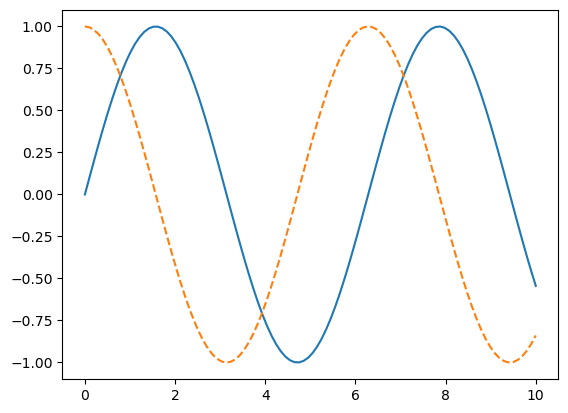

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Dual Interface

* MATLAB-style Interface
   * Matplotlib: Python alternative for MATLAB
   * Use `plt` for almost everything
   * Convenient for simple plots
* Object-oriented interface
   * Create objects and call methods on them
   * More flexible

MATLAB-style:<br><br>

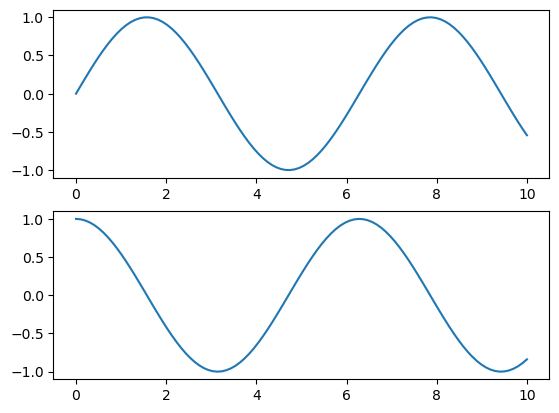

In [9]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

MATLAB-style:<br><br>

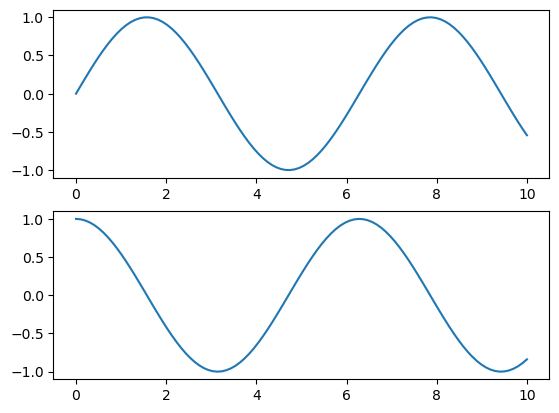

In [11]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2,1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));